### **Ejercicio**: Estimar $x(t)$ por medio de su serie de Fourier.

$
x(t)=
\begin{cases}
0, & -\tfrac{T}{2}\le t< -d,\\[2mm]
m\,t+B, & -d\le t<0,\\[2mm]
-\,m\,t+B, & 0\le t<d,\\[2mm]
0, & d\le t\le \tfrac{T}{2},
\end{cases}
\qquad m=\frac{B}{d},\qquad \omega_0=\frac{2\pi}{T}.
$

Y con $ 0 < d \le \frac{\Tau}{2} $.

In [73]:
import sympy as sp

# Variable independiente
t = sp.symbols('t', real=True)

# Parámetros
T = 2*sp.pi
d = T/4
B = 1.0

m = B/d

# Definición de x(t)
x_t = sp.Piecewise(
    (0, (t >= -T/2) & (t < -d)),     # x(t) = 0 si -T/2 <= t < -d
    (m*t + B, (t >= -d) & (t < 0)),  # x(t) = mt + B si -d <= t < 0
    (-m*t + B, (t >= 0) & (t < d)),  # x(t) = -mt + B si 0 <= t < d
    (0, (t >= d) & (t <= T/2))       # x(t) = 0 si d <= t <= T/2
)

#### Cálculo de los términos $C_n$

In [74]:
# Índice de armónicos
n = sp.symbols('n', integer=True)

# Frecuencia fundamental
w_0 = 2 * sp.pi / T

$
x(t)\sim\sum_{n=-\infty}^{\infty} C_n\,e^{j n\omega_0 t},
\qquad
C_n=\frac{1}{T}\int_{-T/2}^{T/2}x(t)\,e^{-j n\omega_0 t}\,dt.
$

$
C_0=\frac{1}{T}\!\left(\int_{-d}^{0}(m t+B)\,dt+\int_{0}^{d}(-m t+B)\,dt\right)
=\frac{B d}{T}.
$

In [75]:
C_0 = B * d / T

$
C_n=\frac{1}{T}\!\left(\int_{-d}^{0}(m t+B)e^{-j a t}\,dt+\int_{0}^{d}(-m t+B)e^{-j a t}\,dt\right),
\quad a=n\omega_0\neq 0.
$

Antiderivadas útiles:

$
\int e^{-j a t}\,dt=\frac{j}{a}e^{-j a t},\qquad
\int t\,e^{-j a t}\,dt=\frac{(1+j a t)e^{-j a t}}{a^2}.
$

$
\begin{aligned}
I_1&=\int_{-d}^{0}(m t+B)e^{-j a t}\,dt
=\frac{m}{a^2}\!\left[1-(1-j a d)e^{j a d}\right]
+\frac{B j}{a}\!\left[1-e^{j a d}\right],\\
I_2&=\int_{0}^{d}(-m t+B)e^{-j a t}\,dt
=-\frac{m}{a^2}\!\left[(1+j a d)e^{-j a d}-1\right]
+\frac{B j}{a}\!\left[e^{-j a d}-1\right].
\end{aligned}
$

$
I_1+I_2=\frac{2m}{a^2}\!\left[1-\cos(a d)-a d\sin(a d)\right]+\frac{2B}{a}\sin(a d).
$

$
m=\frac{B}{d}\;\Rightarrow\; I_1+I_2=\frac{2B}{d\,a^2}\left[1-\cos(a d)\right].
$

$
C_n=\frac{1}{T}(I_1+I_2)
=\frac{B T}{2\pi^2 d\,n^2}\!\left(1-\cos\frac{2\pi n d}{T}\right),\quad n\neq 0.
$

In [76]:
C_n = B * T / (2 * sp.pi**2 * d * n**2) * (1 - sp.cos(2 * sp.pi * n * d / T))

**Por lo tanto, la aproximación por 2N+1 armónicos de $x(t)$ será**

$
\hat{x}_N(t)= C_0 + \sum_{n=-N}^{N}C_n\,e^{j n\omega_0 t},\quad n\neq 0
$.

In [77]:
N = 20

x_hat = C_0 + sum(C_n.subs(n, k) * sp.exp(sp.I * k * w_0 * t) for k in range(-N, N+1) if k != 0)

### **Resultados**:

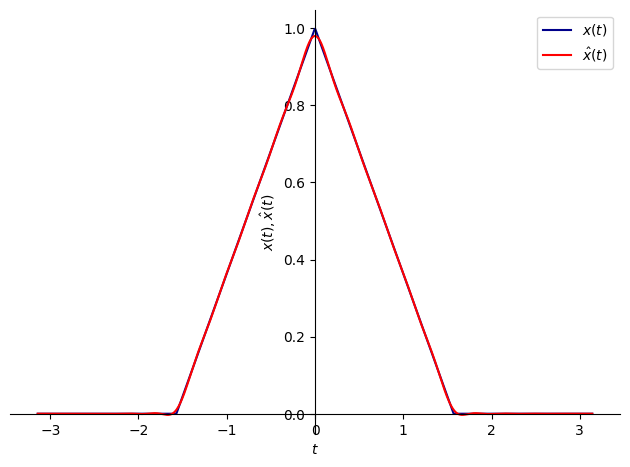

In [78]:
p1 = sp.plotting.plot(x_t, (t, -T/2, T/2), show=False, label='$x(t)$', line_color='darkblue')
p2 = sp.plotting.plot(x_hat, (t, -T/2, T/2), show=False, label='$\\hat{x}(t)$', line_color='red')
p1.append(p2[0])
p1.xlabel = '$t$'
p1.ylabel = '$x(t), \\hat{x}(t)$'
p1.legend = True
p1.show()

#### Error de la estimación ($e_r$ [%]):

In [80]:
# Error de la estimación
e_r = sp.integrate((x_t - x_hat)**2, (t, -T/2, T/2)) / sp.integrate(x_t**2, (t, -T/2, T/2)) * 100

PolynomialDivisionFailed: couldn't reduce degree in a polynomial division algorithm when dividing [0.138888888888889*pi**4 + 0.217045054898667*pi**2 + 5.46156400349187, 0.0555555555555556*pi**4 + 0.191701357165005*pi**2 + 9.78492581984119, -0.04*pi**4 + 0.0714971671729403*pi**2 + 7.77338143903528, -0.0355555555555555*pi**4 - 0.107883663138007*pi**2 + 2.39704178326173, 0.00736961451247166*pi**4 - 0.220043562712817*pi**2 - 0.325142281547134, 0.0102040816326531*pi**4 - 0.176683968737226*pi**2 + 0.583792094222223, -0.0123456790123457*pi**4 - 0.0777120478243478*pi**2 + 1.56020121452049, -0.0138271604938272*pi**4 - 0.0603525921972822*pi**2 + 0.748767654126281, 0.00173553719008264*pi**4 - 0.102271478371862*pi**2 - 0.202804601916391, 0.00413223140495868*pi**4 - 0.100368721311501*pi**2 + 0.075991342873972, -0.00591715976331361*pi**4 - 0.052819920744556*pi**2 + 0.616644405588072, -0.00724550175099626*pi**4 - 0.0350283619558453*pi**2 + 0.355227611062798, 0.000657596371882086*pi**4 - 0.0561462185558503*pi**2 - 0.118449250841018, 0.00222222222222222*pi**4 - 0.059826410827447*pi**2 + 0.00221996501334021, -0.00346020761245675*pi**4 - 0.0347285076278434*pi**2 + 0.318433651896841, -0.00444273569994446*pi**4 - 0.0210739147375823*pi**2 + 0.207078444863863, 0.000316336650593345*pi**4 - 0.0242089485757996*pi**2 - 0.0337411117903696, 0.00138504155124654*pi**4 - 0.0100511627836116*pi**2 + 0.0855552069928546, 0.00810282528694488*pi**2 + 0.196094839472827, 0.005612645698635*pi**2 + 0.0831839147048329, -0.00289133361929398*pi**2 + 0.000954881564153506, -0.00392380299165827*pi**2 - 0.00281689686458291, -0.000295884521327305*pi**2 + 0.0166296788589405, 0.000584453805849477*pi**2 + 0.0123907790377319, -0.00103237680369197*pi**2 - 0.00130931497240871, -0.0012937329485543*pi**2 - 0.00135069944183685, -0.000155697776457049*pi**2 + 0.00501185220756904, 0.00018111820802886*pi**2 + 0.00408487230398333, -0.000361693774966232*pi**2 - 0.000470159866926782, -0.000470727390030326*pi**2 - 0.000557117981053658, -6.65764388491614e-5*pi**2 + 0.00174631719165056, 7.64199948975043e-5*pi**2 + 0.00154372354647753, -9.76824547331577e-5*pi**2 - 4.24425898326042e-5, -0.000143659066384015*pi**2 - 0.000182177803913054, -2.2246081592135e-5*pi**2 + 0.000518244551719443, 3.77036720629337e-5*pi**2 + 0.000537649944260634, 1.53467207894353e-5*pi**2 + 0.000151460109611661] by [-0.00692729766803841*pi**6 - 0.0274123611628105*pi**4 + 0.661800518115138*pi**2 - 5.02621328522772, -0.00549382716049383*pi**6 - 0.0563570243780721*pi**4 + 0.886412810118943*pi**2 - 7.28425442600079, -0.000241874527588813*pi**6 - 0.0576546850751506*pi**4 + 0.455213450456369*pi**2 - 3.87577670937082, 0.000447915791831136*pi**6 - 0.034362862744615*pi**4 + 0.0445044394701614*pi**2 + 0.169737339938674, -0.00196663027350858*pi**6 - 0.0166767606262244*pi**4 + 0.0638842531547381*pi**2 + 0.405098160772649, -0.00209190672153635*pi**6 - 0.0185763246165852*pi**4 + 0.214146502131673*pi**2 - 1.31518205147188, -0.000189146736097728*pi**6 - 0.0238993733783925*pi**4 + 0.159375873714233*pi**2 - 1.36900137630361, 0.000212223242526273*pi**6 - 0.0181859255747339*pi**4 + 0.0174961460753092*pi**2 - 0.0299956250161965, -0.000923858149965376*pi**6 - 0.00952277971978195*pi**4 + 0.0155838322186395*pi**2 + 0.297779417200839, -0.00108850246212884*pi**6 - 0.00927758491324312*pi**4 + 0.0921523156675845*pi**2 - 0.490607863993992, -0.00012344188168364*pi**6 - 0.0126814339997158*pi**4 + 0.079744267685625*pi**2 - 0.685233238855623, 0.000120937263794407*pi**6 - 0.0106160996473191*pi**4 + 0.0090635207989264*pi**2 - 0.0463247684762046, -0.000535454075118307*pi**6 - 0.00587895339443647*pi**4 + 0.00468836902705736*pi**2 + 0.183428095739419, -0.000665105064054186*pi**6 - 0.00529872822647845*pi**4 + 0.050033910833409*pi**2 - 0.238444145648291, -8.4516848613902e-5*pi**6 - 0.00623053837337205*pi**4 + 0.0492351756490688*pi**2 - 0.355635187839292, 7.76856105561234e-5*pi**6 - 0.0026383450350383*pi**4 + 0.0101014549342069*pi**2 + 0.0469349081098904, -3.41985568209022e-5*pi**6 + 0.000243154637158998*pi**4 + 0.0120798873700199*pi**2 + 0.0614861383669835, -0.000251202921739124*pi**4 + 0.0205240410351181*pi**2 - 0.151631484523148, -0.000738954344498819*pi**4 + 0.0061639427824772*pi**2 - 0.100840145690386, -0.000684528242258023*pi**4 + 0.00112593255124123*pi**2 - 0.0119129349854735, -0.000201065615224862*pi**4 + 0.00210540174435342*pi**2 + 0.0145194686085183, -5.13626511911816e-5*pi**4 + 0.00239585161503082*pi**2 - 0.00877658583256613, -0.000205189543980586*pi**4 + 0.000949253804990914*pi**2 - 0.0174138063565483, -0.000217710157777608*pi**4 + 0.000219016692717457*pi**2 - 0.00237565487187961, -7.13511100041056e-5*pi**4 + 0.000628817007753916*pi**2 + 0.00480005481047694, -1.78423835720887e-5*pi**4 + 0.000765895436555932*pi**2 - 0.00238174116294605, -7.11407557484768e-5*pi**4 + 0.000315735637506677*pi**2 - 0.00581638255971662, -7.86190561762664e-5*pi**4 + 7.15112453234974e-5*pi**2 - 0.000918754344042782, -2.68700892842175e-5*pi**4 + 0.00021843366961492*pi**2 + 0.00174370761538754, -4.93391467435784e-6*pi**4 + 0.000277677273522285*pi**2 - 0.000713428030042594, -2.11014515549068e-5*pi**4 + 0.000122662236590303*pi**2 - 0.00201335459926588, -2.41331141184837e-5*pi**4 + 2.62925738410333e-5*pi**2 - 0.000404586411299385, -8.3811876014222e-6*pi**4 + 6.47249956953899e-5*pi**2 + 0.000531139175147771, 5.08352020135764e-7*pi**4 + 8.72651450134231e-5*pi**2 - 0.0001208253797178, 1.6373578040855e-8*pi**4 + 4.63098998548504e-5*pi**2 - 0.000470953204322111, -3.78931377516921e-7*pi**4 + 9.07063701190416e-6*pi**2 - 0.000173058688419629]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[pi]. Your working precision or tolerance of computations may be set improperly. Adjust those parameters of the coefficient domain and try again.